In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge

# Problem 1
## 1
### A
Let $\vert\vert z_1 \in \mathbb{R}^{m_1}$ and let $z_2 \in \mathbb{R}^{m_2}$. Moreover, let $z = (z_1, z_2)$. Then, we have that 
$\begin{align}
\vert\vert z_1 \vert\vert_2^2 &= \sum_{i=1}^{m_1} z_{1, i}^2 \\
\vert\vert z_2 \vert\vert_2^2 &= \sum_{i=1}^{m_2} z_{2, i}^2 \\
\implies \vert\vert z_1 \vert\vert_2^2 + \vert\vert z_2 \vert\vert_2^2 & = \sum_{i=1}^{m_1} z_{1, i}^2 + \sum_{i=1}^{m_2} z_{2, i}^2 \\
& = \sum_{i = 1}^{m_1} z_i^2 + \sum_{i = m_1+1}^{m_1+m_2} z_i^2 \\
& = \sum_{i=1}^{m_1+m_2} z^2_i \\
\implies \vert\vert z_1 \vert\vert_2^2 + \vert\vert z_2 \vert\vert^2_2 & = \sum_{i=1}^{m_1+m_2} z^2_i
\end{align}$

### B

## 2
### A

### B

In [ ]:
def soft_thresholding(a, b):
    """Apply the soft-thresholding function."""
    return np.sign(a) * np.maximum(np.abs(a) - b, 0)

def calculate_beta_j_star(y, X, lambda_, alpha, beta_tilde, j):
    """
    Calculate the optimal beta_j_star for a given j, holding other coefficients at their candidate values.
    
    :param y: Dependent variable vector.
    :param X: Independent variable matrix (standardized).
    :param lambda_: Regularization parameter lambda.
    :param alpha: Additional parameter alpha.
    :param beta_tilde: Candidate values for beta coefficients.
    :param j: Index of the coefficient to optimize.
    :return: Optimal value of beta_j_star.
    """
    n = X.shape[0]  # Number of rows in X
    
    X_j = X[:, j]  
    beta_tilde_j = np.copy(beta_tilde)  
    beta_tilde_j[j] = 0  
    residual = y - (beta_tilde[0] + X @ beta_tilde_j)  # Calculate residual
    
    numerator = X_j.T @ residual
    
    beta_j_star = soft_thresholding(numerator, alpha * lambda_) / n
    
    return beta_j_star

## 3 \& 4

In [ ]:
def normalize_X(X):
    """Normalize the feature matrix X (excluding the intercept if present)."""
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_normalized = (X - mean_X) / std_X
    return X_normalized, mean_X, std_X

def calculate_residual(y, X, beta, j):
    """Calculate residual excluding contribution from j-th feature."""
    return y - X @ beta + X[:, j] * beta[j]

def update_beta_j(y, X, beta, lambda_, n, j):
    """Update rule for beta_j using soft-thresholding."""
    if j == 0:  
        return X[:, j].T @ (y - X @ beta + X[:, j] * beta[j]) / n
    else:
        residual = calculate_residual(y, X, beta, j)
        return soft_thresholding(X[:, j].T @ residual, lambda_) / (X[:, j].T @ X[:, j])

def coordinate_descent(y, X, lambda_, epsilon=0.1, active_set_strategy=True):
    n, p = X.shape
    beta = np.zeros(p)
    beta_prev = np.copy(beta)
    indices = np.arange(p)
    
    X, mean_X, std_X = normalize_X(X)
    X = np.hstack((np.ones((n, 1)), X))  
    
    converged = False
    while not converged:
        if active_set_strategy:
            active_indices = indices[beta != 0]
            cycling_indices = active_indices if active_indices.size > 0 else indices
        else:
            cycling_indices = indices
        
        for j in cycling_indices:
            beta[j] = update_beta_j(y, X, beta, lambda_, n, j)
        
        objective_diff = np.linalg.norm(beta - beta_prev)
        if objective_diff < epsilon:
            if active_set_strategy and (cycling_indices.size < p):
                active_set_strategy = False
            else:
                converged = True
        else:
            beta_prev = np.copy(beta)
    
    return beta

In [6]:
data = pd.read_csv('ps6.csv').drop('Unnamed: 0', axis=1)
# data is in y x x x x .. form, need to change "v1" to y
data.columns = ['y'] + ['x' + str(i) for i in range(data.shape[1]-1)]

data.head()

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x988,x989,x990,x991,x992,x993,x994,x995,x996,x997
0,46.262314,-0.896915,-0.459789,0.466200,-0.847244,-1.892349,-0.954353,-2.138476,-0.300585,0.640845,...,0.446921,0.742868,1.277909,-1.061503,0.837248,1.224842,-0.084621,-0.166817,-0.334167,-0.121967
1,-96.648999,0.184849,0.617926,0.954666,0.070429,1.292804,-1.408150,-0.900792,0.058544,-1.601378,...,-0.123327,0.202375,-1.390600,0.499964,1.069710,-1.608390,-1.147154,1.184872,0.928585,-0.609970
2,-22.650160,1.587845,-0.720422,-0.947206,1.581195,-0.618254,0.541784,0.149915,0.501346,-0.777815,...,-0.062811,0.456465,0.096263,0.221467,-1.235428,0.736869,-1.001701,0.581641,1.941146,0.416230
3,114.378196,-1.130376,-0.583512,0.038563,0.020598,1.040938,-1.243239,1.126413,-0.109977,-1.647392,...,0.200268,1.511462,0.327510,0.352731,0.823882,0.579083,-0.903109,-0.316210,0.296681,-0.165842
4,3.446211,-0.080252,0.216325,-0.830882,-0.123371,1.175879,-2.035629,1.249366,-1.309643,0.154266,...,0.158417,-0.174594,-0.302418,-0.534555,-0.042618,0.451430,-1.276987,2.214985,-0.456991,-0.279551


In [13]:
X = data.drop('y', axis=1).values
y = data['y'].values

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# LEFT HAND SIDE
print('LEFT HAND SIDE')
ridge_coef_left  = np.linalg.inv(X.T @ X + np.eye(X.shape[1])) @ X.T @ y

# RIGHT HAND SIDE
print('RIGHT HAND SIDE')
ridge_coef_right = X.T @ np.linalg.inv(X @ X.T + np.eye(X.shape[0])) @ y

# Print the greatest difference between the two 
print('The greatest difference between the two is:', np.max(np.abs(ridge_coef_left - ridge_coef_right)))

LEFT HAND SIDE
RIGHT HAND SIDE
The greatest difference between the two is: 7.508882404749784e-12


This difference is really small $(10^{-12})$, so I am comfortable saying that these results are numerically equal. 

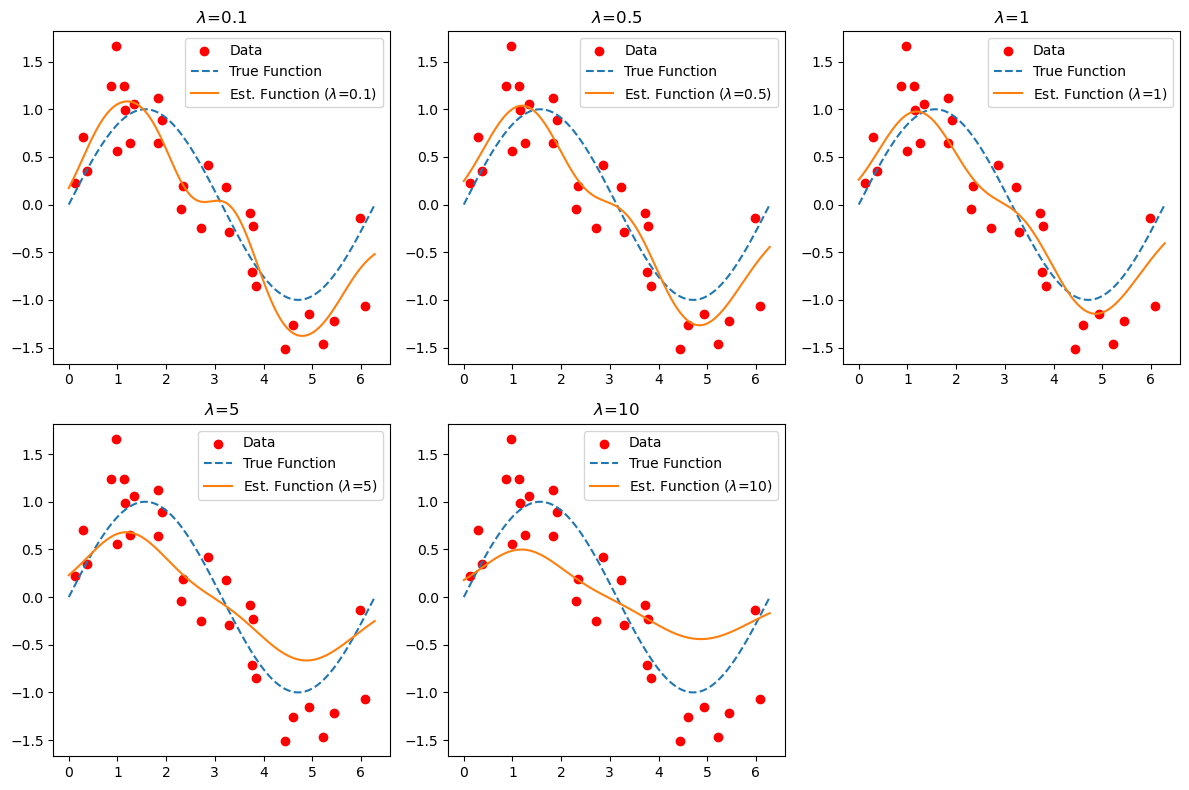

In [14]:
np.random.seed(428)

# DGP from pset 1
def generate_data(n=30):
    x = np.random.uniform(0, 2*np.pi, n)
    y = np.sin(x) + np.random.normal(0, np.sqrt(0.2), n)
    return x, y

x, y = generate_data()

X = x.reshape(-1, 1)

# True function
x_plot = np.linspace(0, 2*np.pi, 1000)
y_true = np.sin(x_plot)

# Lambda values
lambdas = [0.1, 0.5, 1, 5, 10]

# Plot
plt.figure(figsize=(12, 8))
for i, lmbda in enumerate(lambdas):
   
    model = KernelRidge(alpha=lmbda, kernel='rbf', gamma=1)
    model.fit(X, y)
    
    
    y_pred = model.predict(x_plot.reshape(-1, 1))

    plt.subplot(2, 3, i+1)
    plt.scatter(x, y, color='red', label='Data')
    plt.plot(x_plot, y_true, label='True Function', linestyle='--')
    plt.plot(x_plot, y_pred, label=f'Est. Function ($\lambda$={lmbda})')
    plt.legend()
    plt.title(f'$\lambda$={lmbda}')

plt.tight_layout()
plt.show()


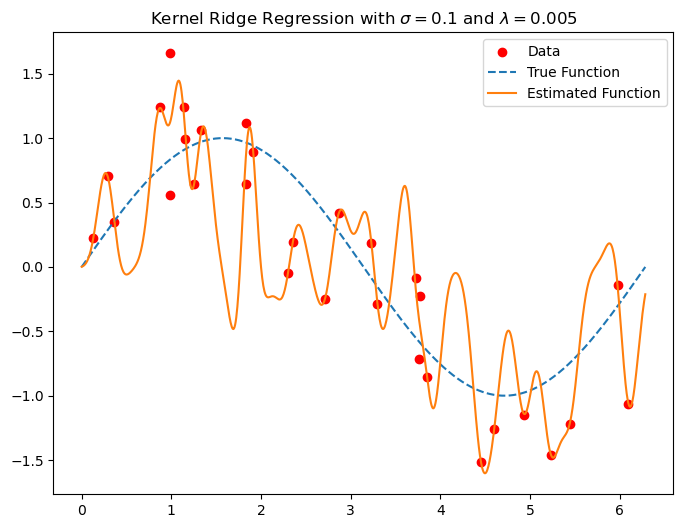

In [15]:
# new parameters
sigma = 0.1
gamma = 1 / (2 * sigma ** 2)
lambda_ = 0.005

model = KernelRidge(alpha=lambda_, kernel='rbf', gamma=gamma)
model.fit(X, y)

y_pred = model.predict(x_plot.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_plot, y_true, label='True Function', linestyle='--')
plt.plot(x_plot, y_pred, label='Estimated Function')
plt.legend()
plt.title(f'Kernel Ridge Regression with $\sigma={sigma}$ and $\lambda={lambda_}$')
plt.show()